# Analysis of simulation from [CompuCell3D](http://compucell3d.org)

### New differentiation model

#### Previous work

Here is a short reminder of the previous simulation campaign:

!['Figure 1'](figure1.png)

In Figure 1 C, mitosis and differentiation are described as a single step process.
As a consequence, three probabilities need to be set:

- symertric renewal Psr
- asymertric renewal Par
- symertric differentiation Psd


To lower the number of parameters, we instead considered differentiation and mitosis as
two separate processes, both daughter cells being independently tested for differention (Figure 2A bellow).

We define the self-renewing probability **Ps** and the differentiating probability **Pd**. The previous probabilities can be expressed as a function of the new ones, as detailled on the figure bellow
for each daughter cell.

#### New model

We consider 3 scenarios:

- Differentiation is independant from the cells neighborhood
- Differentiation depends on the **mother cell** neighborhood **before** division
- Differentiation depends on the **daughter cells** neighborhoods **after** division

This neighborhood depedence is quantified by stating that the **clustering coefficient** of the cell,
as depicted on figure 2B bellow.

!['Figure 2'](definitions.png)


#### Results



![Big Figure](simulation_exploration.png)

## The code to generate those figures is detailed bellow 

#### Setting the directory containing the data

In [1]:
DATA_ROOT_base = '/home/guillaume/CC3DWorkspace/Sim2_ParameterScan_'
suffixes = ['{}_Ps0.7'.format(a) for a in ['none', 'before', 'after']]

In [2]:
import os

from cc3d_parser import *
from plot_routines import *
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

/home/guillaume/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
collected_tumors = {}

for suffix in suffixes:
    DATA_ROOT = DATA_ROOT_base + suffix
    sim_name = suffix
    print("Treating  {}".format(sim_name))
    collected_tumors[suffix] = parse_data_dir(DATA_ROOT)


Treating  none_Ps0.7
Treating  before_Ps0.7
Treating  after_Ps0.7


#### Plotting time evolution

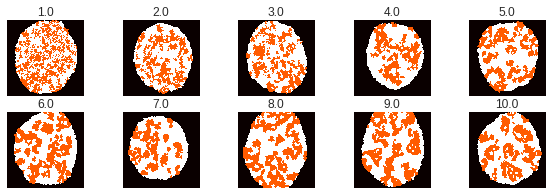

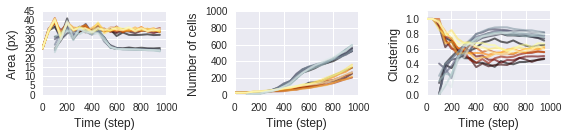

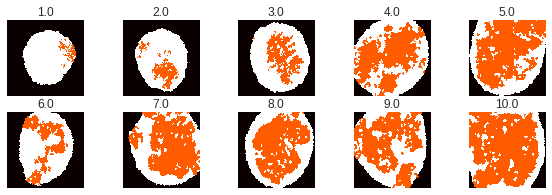

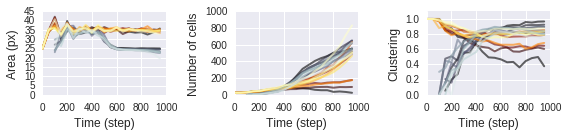

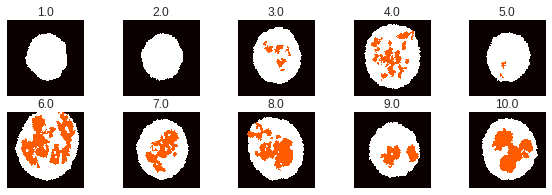

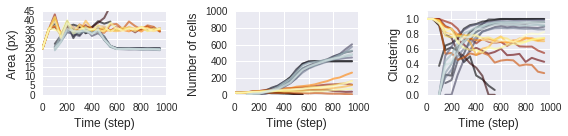

In [7]:

for suffix in suffixes:

    tumors = collected_tumors[suffix]
    frame_num = -1
    dpi = 90

    pix_width = 900
    pix_height = 300

    f_size_i = (pix_width/dpi, pix_height/dpi)

    fig, axes = show_type(tumors, frame_num, f_size_i)

    plt.savefig('types_{}.svg'.format(suffix))
    
    pix_width = 800
    pix_height = 200

    f_size_i = (pix_width/dpi, pix_height/dpi)
    fig, axes = show_time_components(tumors, f_size_i)
    #axes[-1].colormap()
    #plt.savefig('evolution_{}.svg'.format(suffix))


In [6]:
### Colorbars
title = u'Differential adhesion' 
cmaps = {'csc_cm': (csc_cm, diff_adh,  u'Cancer Stem Cells'), # (Colormap, ticks, cmap_label)
         'npc_cm': (npc_cm, diff_adh, u'Non Porliferative Cells')}
        
plot_color_gradients(cmaps, title)
plt.savefig('diff_adh_colorbars.svg')

NameError: name 'diff_adh' is not defined

### Agregated data over multiple simulations

In [8]:
collected_data = collect_tumor_data(tumors, collected_tumors, suffixes)

In [9]:
root = os.path.dirname(DATA_ROOT_base)

save_collected(collected_data, root)

Collected summary data stored to collected.h5


In [10]:
collected_data = load_collected(root)

Retrieved summary data from collected.h5


In [11]:
collected_data.head()

,area_frac,clustering_csc,clustering_npc,csc_frac,diff_adh,tumor_size,sim_name
0,1.429380,0.432963,0.952678,0.041594,1,577,before_Ps0.7
1,1.413191,0.599731,0.913121,0.144838,2,649,before_Ps0.7
2,1.410663,0.637390,0.886313,0.215496,3,826,before_Ps0.7
3,1.497414,0.778101,0.818807,0.428070,4,1140,before_Ps0.7
4,1.471401,0.839543,0.810206,0.537808,5,1177,before_Ps0.7


### Summary plot of the collected data 

In [12]:

sim_names = collected_data.sim_name.unique()
sim_norm  = matplotlib.colors.Normalize(vmin=0, vmax=len(sim_names))
sim_map = plt.cm.ScalarMappable(norm=sim_norm, cmap=sim_cm)



NameError: name 'matplotlib' is not defined

In [13]:
pix_width = 600
pix_height = 1024

f_size_i = (pix_width/dpi, pix_height/dpi)

columns = [
    'area_frac',
    'clustering_csc',
    'clustering_npc',
    'csc_frac',
    'tumor_size']

ylabels = {
    'area_frac': 'CSC to NPC area ratio',
    'clustering_csc': 'CSC clustering',
    'clustering_npc': 'NPC clustering',
    'csc_frac': 'Fraction of CSC cells',
    'tumor_size': 'CSC final population'
    }

ylims = {
    'area_frac': (1, 2.5),
    'clustering_csc': (0, 1.1),
    'clustering_npc': (0, 1.1),
    'csc_frac': (0, 1.1),
    'tumor_size': (0, 2000)
    }
name_labels = {
    'before_Ps0.7': 'Diff. before division',
    'after_Ps0.7': 'Diff. after division',
    'none_Ps0.7': 'Env. independant division'
    }

sim_colors = {key: sim_map.to_rgba(i) for i, key 
              in enumerate(collected_data.sim_name.unique())}



fig, axes = plt.subplots(len(columns), 1, sharex=True)
fig.set_size_inches(f_size_i)
for col, ax in zip(columns, axes):
    for key, df in collected_data.groupby('sim_name'):
        sns.regplot(data=df, x='diff_adh', y=col, color=sim_colors[key],
                    ax=ax, label=name_labels[key])
    ax.set_ylabel(ylabels[col])
    ax.set_xlabel('')
    ax.set_ylim(ylims[col])
axes[-1].set_xlabel('Differential adhesion energy')
axes[-1].legend(loc='upper left')
fig.set_tight_layout(True)
plt.savefig('agregated.svg')

NameError: global name 'sim_map' is not defined